      Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
0     Bachelors         2017  Bangalore            3   34    Male          No   
1     Bachelors         2013       Pune            1   28  Female          No   
2     Bachelors         2014  New Delhi            3   38  Female          No   
3       Masters         2016  Bangalore            3   27    Male          No   
4       Masters         2017       Pune            3   24    Male         Yes   
...         ...          ...        ...          ...  ...     ...         ...   
4648  Bachelors         2013  Bangalore            3   26  Female          No   
4649    Masters         2013       Pune            2   37    Male          No   
4650    Masters         2018  New Delhi            3   27    Male          No   
4651  Bachelors         2012  Bangalore            3   30    Male         Yes   
4652  Bachelors         2015  Bangalore            3   33    Male         Yes   

      ExperienceInCurrentDo

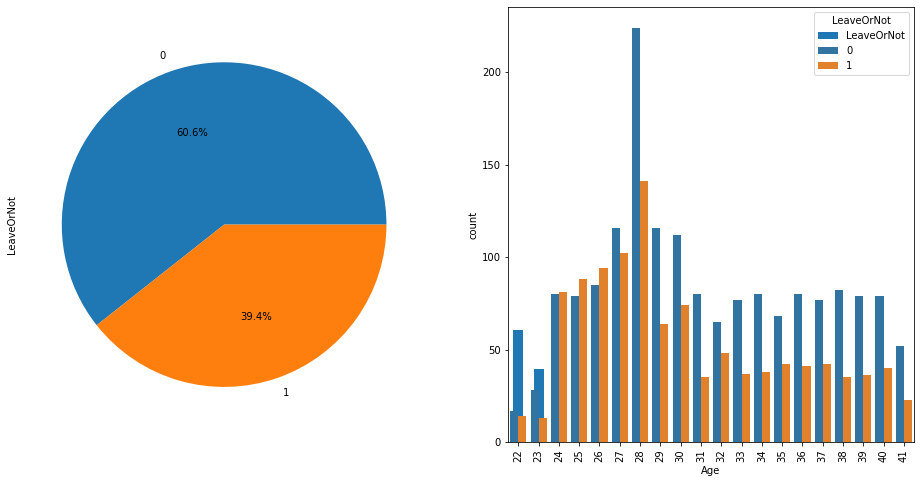

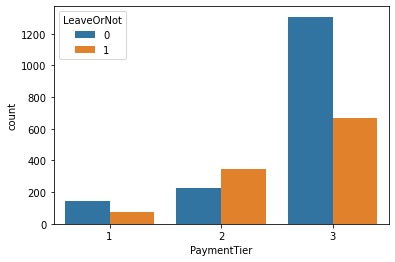

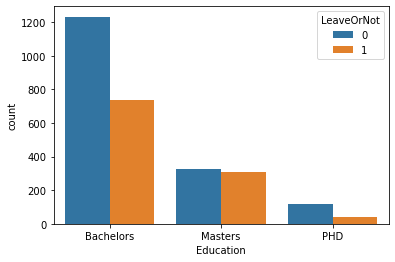

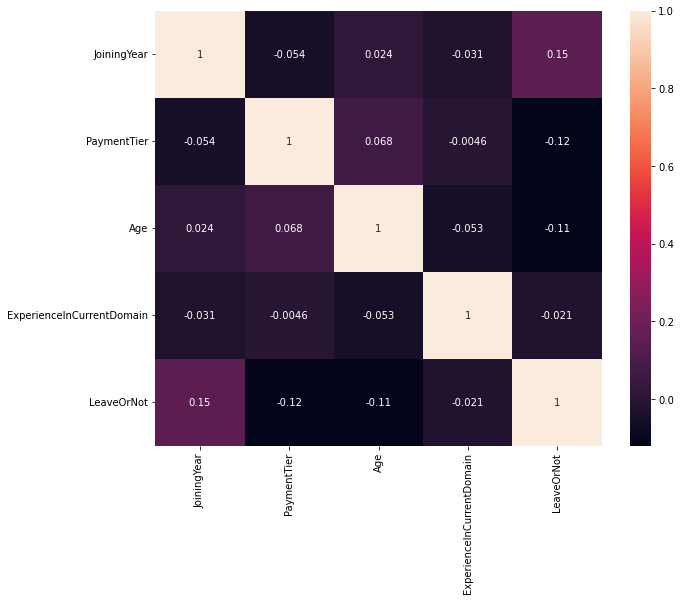

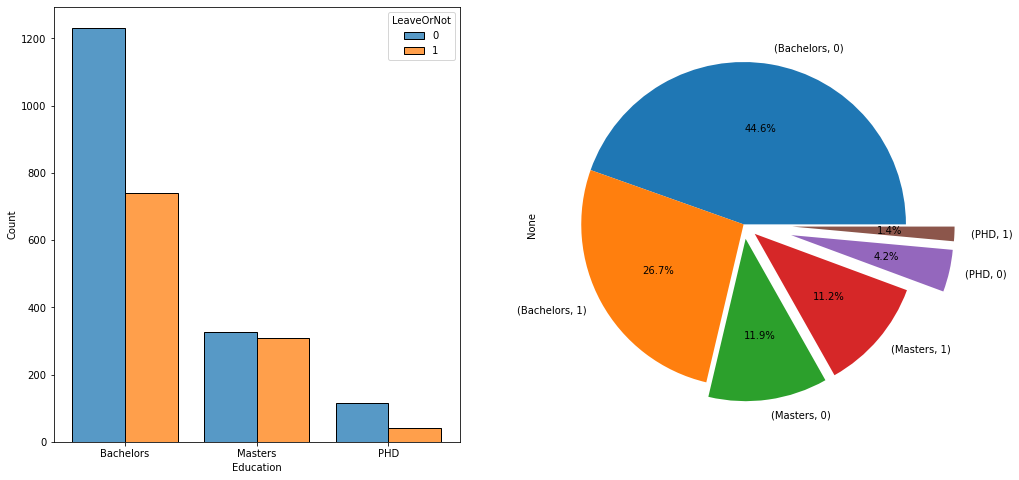

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


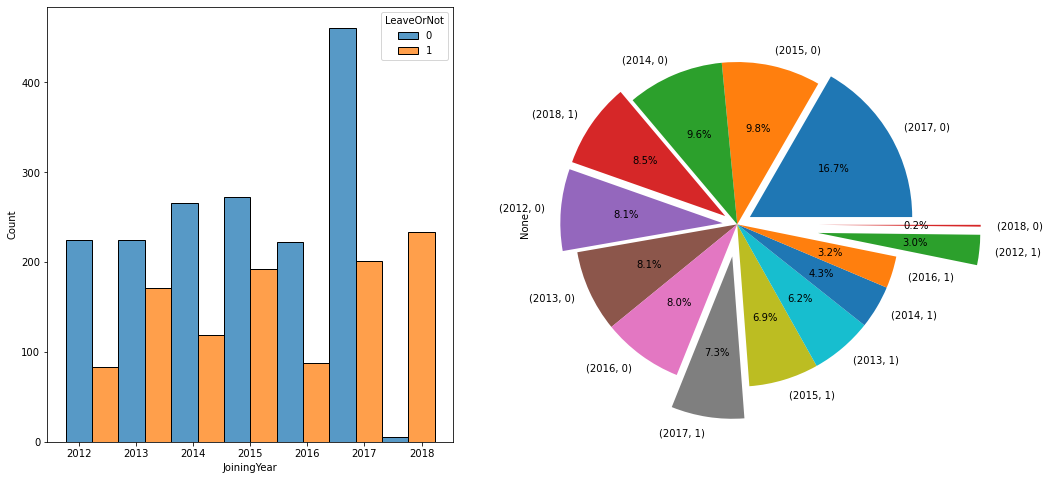

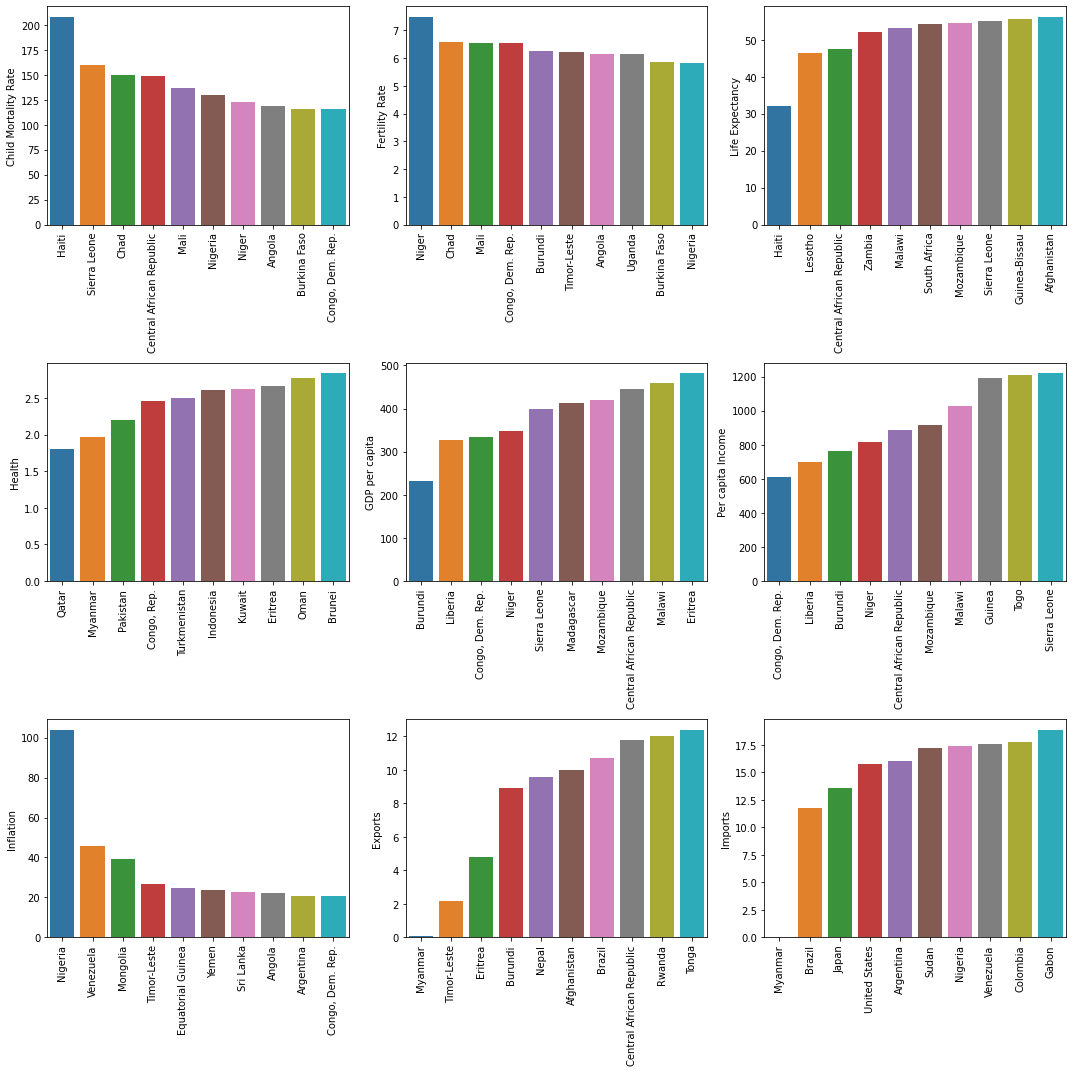

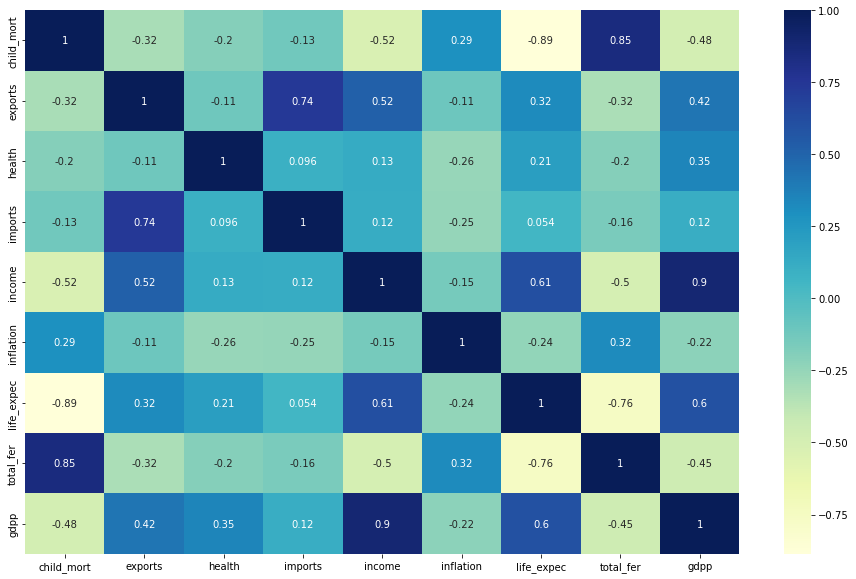

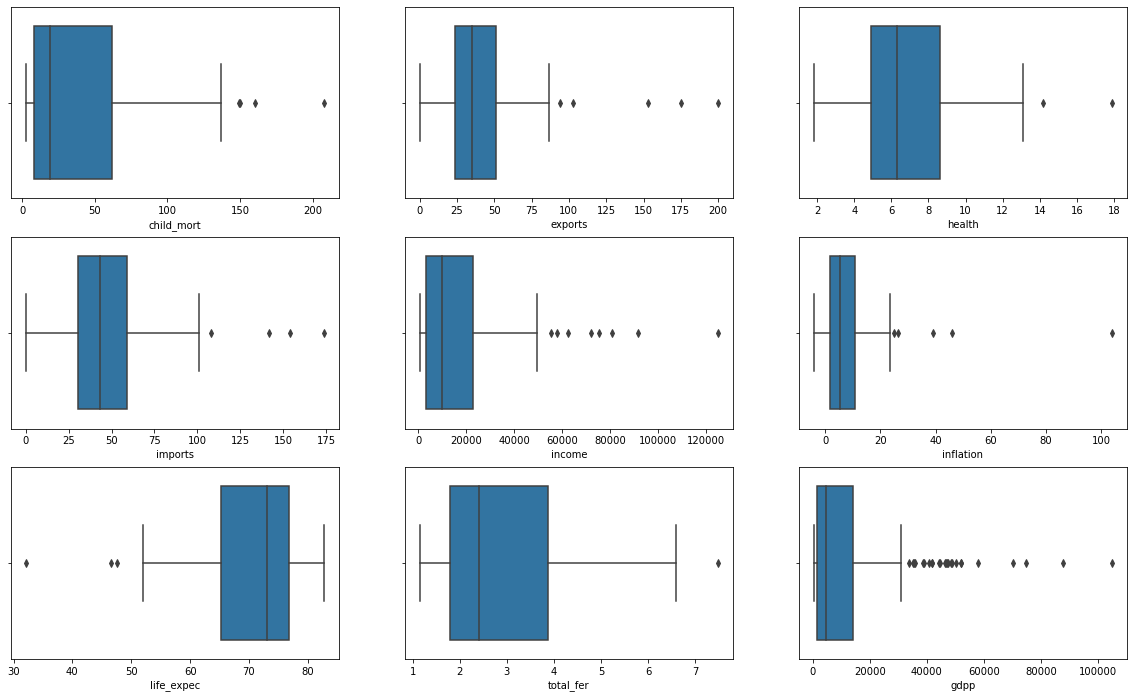

In [1]:
#Employee Prediction code
import pandas as pd
import numpy as np


#2.1 API created using rapidapi
#https://www.employeeprediction.com/api/v2

# 2.2 Read csv
df = pd.read_csv("Employee.csv")
print(df)

df.describe()

# 3.1 Regex
#df = df[df['City'].str.match('^New.*') == True]
#print(df)

# 3.2 Replace null values to 0
df = df.fillna(0)
print(df)

# 3.2 Drop duplicate
duplicates = df.duplicated().sum()
df = df.drop_duplicates()

print('No. of duplicate records :',duplicates)
print('Shape after dropping duplicate records :',df.shape)

# 3.3 for row id,row in df.head(10).iterators():
#print(row)
print(df.count())

# 3.3 iterate over pandas
for row_index, row in df.head(10).iterrows():
 print(row)

# 3.4 merge data
df_location = pd.read_csv("Location.csv")
df_emp = pd.read_csv("emp_new.csv")
df_merged = df_emp.merge(df_location, left_on='employee_id', right_on='employee_id')


print(df_merged)

# 4.1 reusable function
def add(a, b):
   return a + b


call_function = add(8, 4) + add(8, 9)
print(call_function)

# 4.2 numpy

np1 = df['ExperienceInCurrentDomain'].to_numpy
print(np1)


# 4.3  list -- count no.of city with name banglore

list1 = []
dict1 = {}

for row_index, row in df.iterrows():
    if row['City'] == 'Bangalore':
        list1.append(row['City'])

print(len(list1))

# 4.3 Dictionary -- count no. of male and female
dict1 = {'Male': 0, 'Female': 0}

for row_index, row in df.iterrows():
    if row['Gender'] == 'Male':
        dict1['Male'] = dict1['Male'] + 1
    if row['Gender'] == 'Female':
        dict1['Female'] = dict1['Female'] + 1

print(dict1)

#***************************************************************
#Seaborn Matplotlib bar chart
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=2, figsize=(16, 8))
(df['LeaveOrNot'].value_counts(normalize=True) * 100).plot.pie(autopct='%1.1f%%', ax=axs[0])
(df['LeaveOrNot'].value_counts(normalize=True) * 100).plot.bar(ax=axs[1])
# plt.show()

#***********************************************************
import seaborn as sns

sns.countplot(data = df ,x='Age',hue='LeaveOrNot')
plt.show()
sns.countplot(data = df ,x='PaymentTier',hue='LeaveOrNot')
plt.show()
sns.countplot(data = df ,x='Education',hue='LeaveOrNot')
plt.show()
f, ax =plt.subplots(figsize=(10,8))
ax=sns.heatmap(df.corr(),annot=True)
plt.show()

fig, axs = plt.subplots(ncols=2,figsize=(16, 8))
explode = [0.0,0.0,0.09,0.09,0.3,0.3]
sns.histplot(data=df, x="Education", hue="LeaveOrNot", multiple="dodge", shrink=.8, ax=axs[0])
(df[['Education','LeaveOrNot']].value_counts(normalize=True)*100).plot.pie(autopct='%1.1f%%', ax=axs[1] ,explode=explode)
plt.show()
fig, axs = plt.subplots(ncols=2,figsize=(16, 8))
explode = [0.09,0.0,0.0,0.09,0.09,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.5,.5]
sns.histplot(data=df, x="JoiningYear", hue="LeaveOrNot", multiple="dodge", shrink=2, ax=axs[0])
(df[['JoiningYear','LeaveOrNot']].value_counts(normalize=True)*100).plot.pie(autopct='%1.1f%%', ax=axs[1] ,explode=explode)

#****************************************************
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt


from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from math import isnan
from random import sample
from numpy.random import uniform

# Numpy and Unsupervised learning
import warnings
warnings.filterwarnings('ignore')
country_df = pd.read_csv("Country-data.csv", sep=",", encoding="ISO-8859-1", header=0)
country_df.head()
country_df.info()
country_df.shape
country_df.describe()
country_df.isnull().sum()
# there is no null values in any column


fig, axs = plt.subplots(3, 3, figsize=(15, 15))

#********************************************************************
# Child Mortality Rate : Death of children under 5 years of age per 1000 live births

top10_child_mort = country_df[['country', 'child_mort']].sort_values('child_mort', ascending=False).head(10)
plt1 = sns.barplot(x='country', y='child_mort', data=top10_child_mort, ax=axs[0, 0])
plt1.set(xlabel='', ylabel='Child Mortality Rate')

#**************************************************************

# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same
top10_total_fer = country_df[['country', 'total_fer']].sort_values('total_fer', ascending=False).head(10)
plt1 = sns.barplot(x='country', y='total_fer', data=top10_total_fer, ax=axs[0, 1])
plt1.set(xlabel='', ylabel='Fertility Rate')

#********************************************************

# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same

bottom10_life_expec = country_df[['country', 'life_expec']].sort_values('life_expec', ascending=True).head(10)
plt1 = sns.barplot(x='country', y='life_expec', data=bottom10_life_expec, ax=axs[0, 2])
plt1.set(xlabel='', ylabel='Life Expectancy')

#*************************************************************

# Health :Total health spending as %age of Total GDP.

bottom10_health = country_df[['country', 'health']].sort_values('health', ascending=True).head(10)
plt1 = sns.barplot(x='country', y='health', data=bottom10_health, ax=axs[1, 0])
plt1.set(xlabel='', ylabel='Health')

#************************************************************

# The GDP per capita : Calculated as the Total GDP divided by the total population.

bottom10_gdpp = country_df[['country', 'gdpp']].sort_values('gdpp', ascending=True).head(10)
plt1 = sns.barplot(x='country', y='gdpp', data=bottom10_gdpp, ax=axs[1, 1])
plt1.set(xlabel='', ylabel='GDP per capita')

#***********************************************************

# Per capita Income : Net income per person

bottom10_income = country_df[['country', 'income']].sort_values('income', ascending=True).head(10)
plt1 = sns.barplot(x='country', y='income', data=bottom10_income, ax=axs[1, 2])
plt1.set(xlabel='', ylabel='Per capita Income')

#***********************************************************

# Inflation: The measurement of the annual growth rate of the Total GDP

top10_inflation = country_df[['country', 'inflation']].sort_values('inflation', ascending=False).head(10)
plt1 = sns.barplot(x='country', y='inflation', data=top10_inflation, ax=axs[2, 0])
plt1.set(xlabel='', ylabel='Inflation')

#***********************************************************
# Exports: Exports of goods and services. Given as %age of the Total GDP

bottom10_exports = country_df[['country', 'exports']].sort_values('exports', ascending=True).head(10)
plt1 = sns.barplot(x='country', y='exports', data=bottom10_exports, ax=axs[2, 1])
plt1.set(xlabel='', ylabel='Exports')

#*****************************************************************

# Imports: Imports of goods and services. Given as %age of the Total GDP

bottom10_imports = country_df[['country', 'imports']].sort_values('imports', ascending=True).head(10)
plt1 = sns.barplot(x='country', y='imports', data=bottom10_imports, ax=axs[2, 2])
plt1.set(xlabel='', ylabel='Imports')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.savefig('eda')
plt.show()
plt.figure(figsize = (16, 10))
sns.heatmap(country_df.corr(), annot = True, cmap="YlGnBu")
plt.savefig('correlationplot')
plt.show()
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(country_df.child_mort)
plt.subplot(3,3,2)
sns.boxplot(country_df.exports)
plt.subplot(3,3,3)
sns.boxplot(country_df.health)
plt.subplot(3,3,4)
sns.boxplot(country_df.imports)
plt.subplot(3,3,5)
sns.boxplot(country_df.income)
plt.subplot(3,3,6)
sns.boxplot(country_df.inflation)
plt.subplot(3,3,7)
sns.boxplot(country_df.life_expec)
plt.subplot(3,3,8)
sns.boxplot(country_df.total_fer)
plt.subplot(3,3,9)
sns.boxplot(country_df.gdpp)
plt.show()
#gdpp seems to have a lot of outliers
country_df.gdpp.describe()
country_df['exports'] = country_df.exports.multiply(country_df.gdpp)
country_df['exports'] = country_df.exports.multiply(0.01)

country_df['health'] = country_df.health.multiply(country_df.gdpp)
country_df['health'] = country_df.health.multiply(0.01)

country_df['imports'] = country_df.imports.multiply(country_df.gdpp)
country_df['imports'] = country_df.imports.multiply(0.01)


